In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
no_metro = pd.read_csv('Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [3]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [4]:
no_metro = no_metro[['funding_status', 'school_charter', 'school_magnet', 'school_year_round', 'school_kipp', 'school_nlns', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match']]

In [5]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')

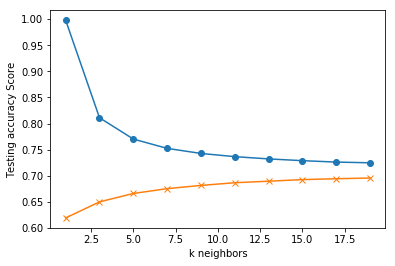

In [9]:
    
#You can also plot it if you want to have a look at it
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
#We predict using the value of k where train and test converge
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.696


In [12]:
#Measure model
from sklearn.metrics import mean_squared_error, r2_score

#Predict a value
predicted = knn.predict(X_test)

mse = mean_squared_error(y_test, predicted)

r2 = r2_score(y_test, predicted)
r2

-0.44746453945066245

In [13]:
mse

0.3043534730900462